**THE SPARKS FOUNDATION**
**#GRIPAPRIL22**

**Author: Poojitha Mallarapu**
---

*Data Science and Business Analytics intern at Sparks Foundation*




**Task-4 Exploratory Data Analysis - ‘Terrorism’**

Perform ‘Exploratory Data Analysis(Intermediate Level)’ on dataset ‘Terrorism’
As a security/defense analyst,finding the hot zone of terrorism.

Dataset: https://bit.ly/2TK5Xn5

In [8]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')#read the data from the dataset
data.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,61,62,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [10]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [11]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)#rename the colnames

In [12]:

data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]#put it in the dataframe

In [13]:
data.head()#the data appears like this

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [14]:
data.shape #indicates total no.of rows and cols

(50609, 18)

In [15]:
data.isnull().sum() #check the nan values

Year              0
Month             0
day               0
Country           0
State           209
Region            0
City              0
latitude       2758
longitude      2758
Attacktype        0
kill           5798
Wound          7619
target1         384
summary       49365
Group             0
Targettype        0
Weapon            0
motive        49646
dtype: int64

In [16]:

data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0) #fillthem according to the colname

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50609 entries, 0 to 50608
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        50609 non-null  int64  
 1   Month       50609 non-null  int64  
 2   day         50609 non-null  int64  
 3   Country     50609 non-null  object 
 4   State       50400 non-null  object 
 5   Region      50609 non-null  object 
 6   City        50609 non-null  object 
 7   latitude    47851 non-null  float64
 8   longitude   47851 non-null  float64
 9   Attacktype  50609 non-null  object 
 10  kill        50609 non-null  float64
 11  Wound       50609 non-null  float64
 12  target1     50225 non-null  object 
 13  summary     1244 non-null   object 
 14  Group       50609 non-null  object 
 15  Targettype  50609 non-null  object 
 16  Weapon      50609 non-null  object 
 17  motive      963 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage: 7.0+ MB


In [18]:

data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,50609.000000,50609.000000,50609.000000,47851.000000,4.785100e+04,50609.000000,50609.000000
mean,1984.263550,6.362090,15.339208,16.865484,-1.823218e+03,1.839633,1.430615
std,5.309432,3.408403,8.827336,25.177543,3.939949e+05,7.993675,9.187508
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1981.000000,3.000000,8.000000,4.410240,-7.697846e+01,0.000000,0.000000
50%,1985.000000,6.000000,15.000000,14.152916,-7.478935e+00,0.000000,0.000000
75%,1989.000000,9.000000,23.000000,38.620748,2.840880e+01,1.000000,0.000000
max,1992.000000,12.000000,31.000000,64.837778,1.784419e+02,422.000000,751.000000


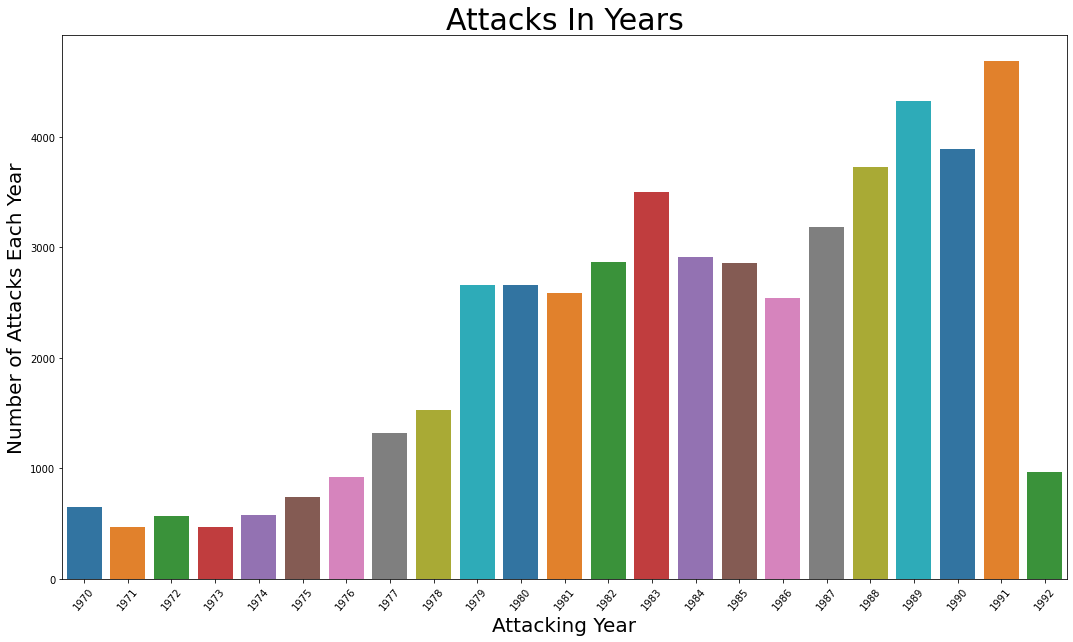

In [19]:
#bargraph representation for attacks in years and %
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")#barplot
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

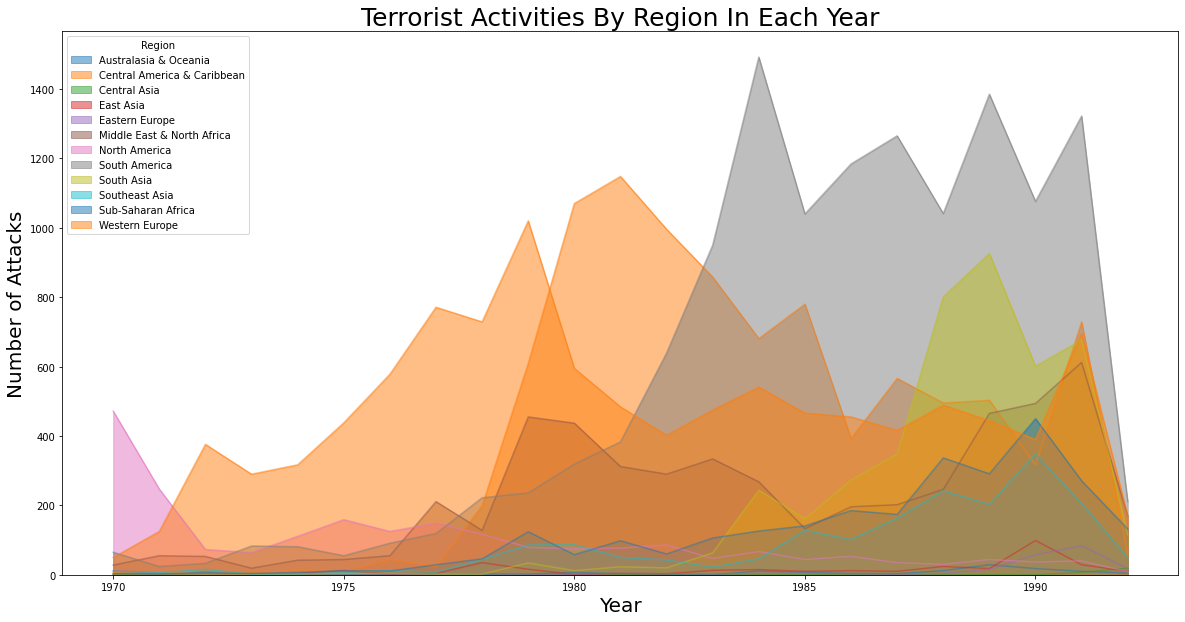

In [20]:
#activities in region
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [21]:
attack = data.Country.value_counts()[:10]
attack

Peru              5478
El Salvador       5263
Colombia          4224
United Kingdom    3458
Spain             2465
Chile             2123
United States     2063
India             1995
Nicaragua         1876
Guatemala         1781
Name: Country, dtype: int64

In [22]:
data.Group.value_counts()[1:10]

Shining Path (SL)                                   4111
Farabundo Marti National Liberation Front (FMLN)    3348
Irish Republican Army (IRA)                         2342
Basque Fatherland and Freedom (ETA)                 1578
New People's Army (NPA)                              904
Palestinians                                         903
Nicaraguan Democratic Force (FDN)                    895
Manuel Rodriguez Patriotic Front (FPMR)              804
Revolutionary Armed Forces of Colombia (FARC)        803
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


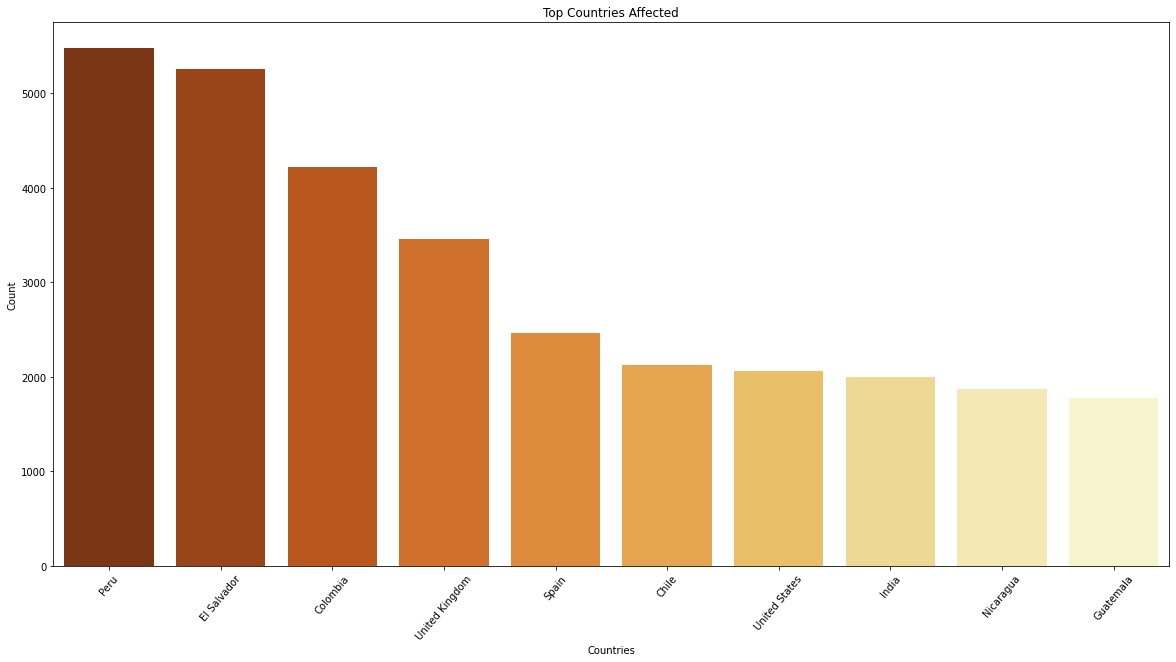

In [23]:
#barplot to find the top countries affected
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

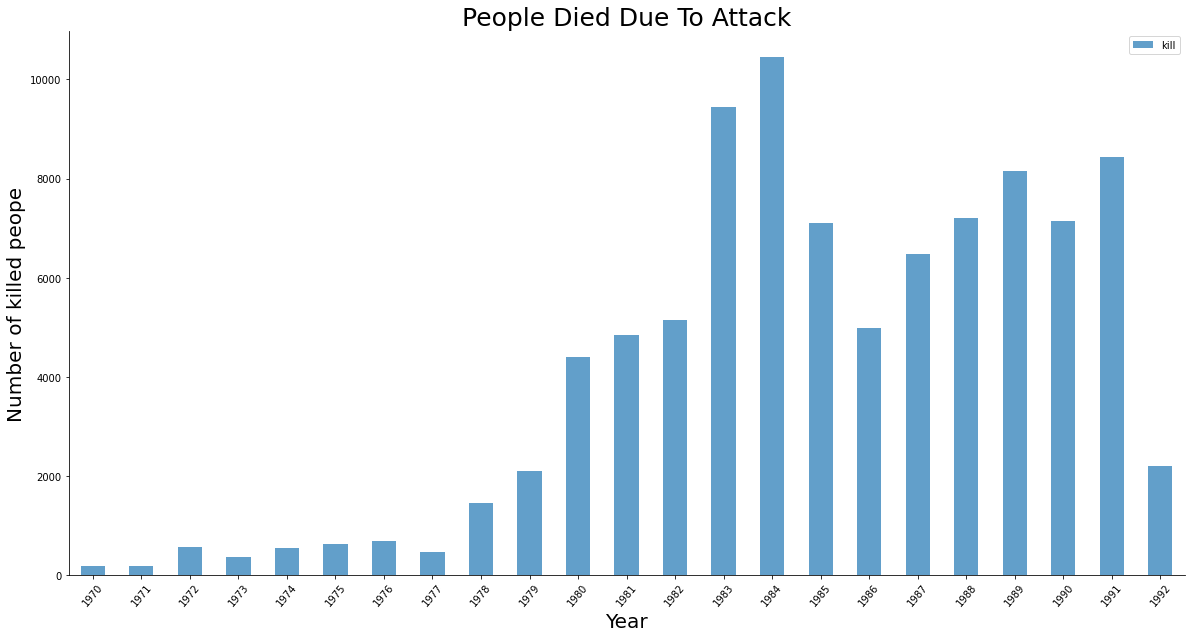

In [24]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

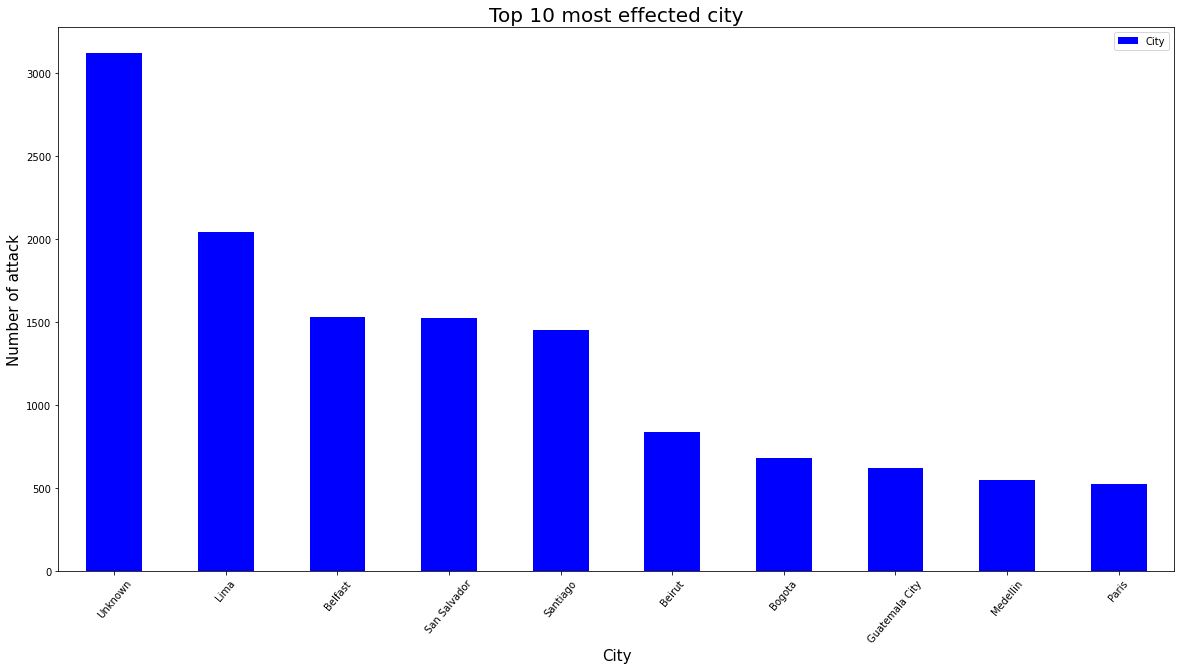

In [25]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

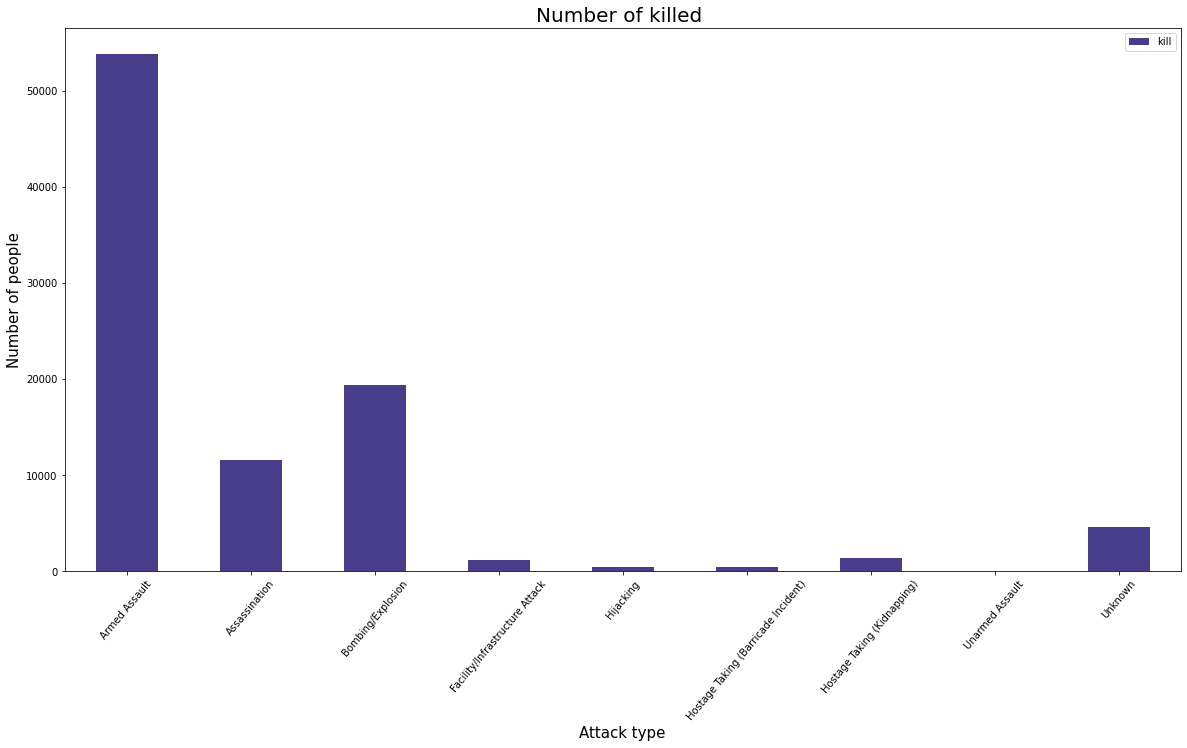

In [26]:

data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

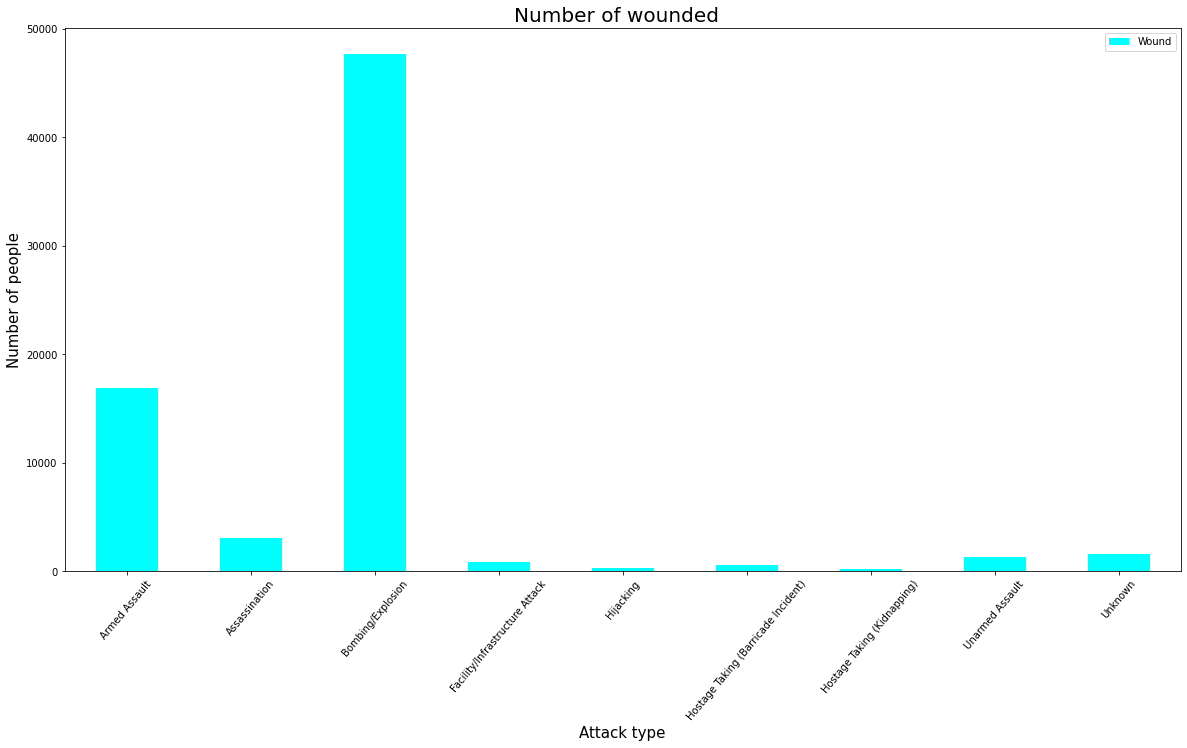

In [27]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


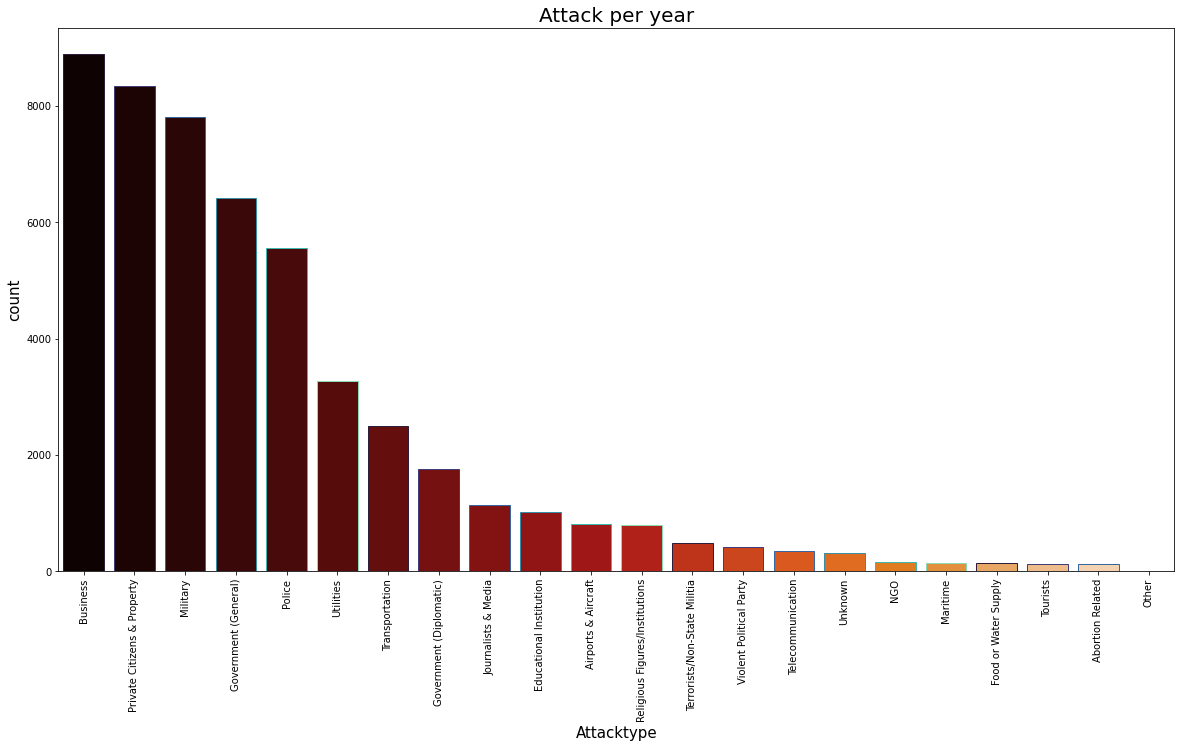

In [28]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

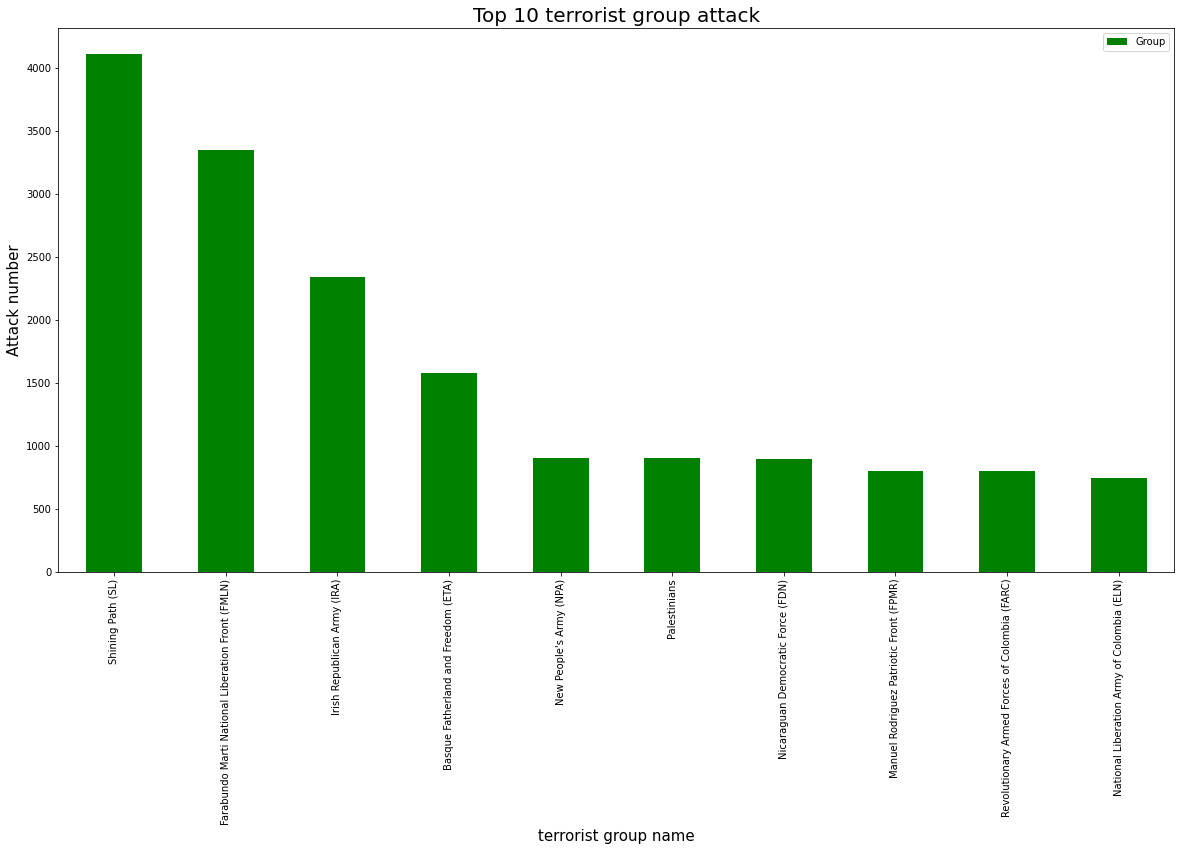

In [29]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

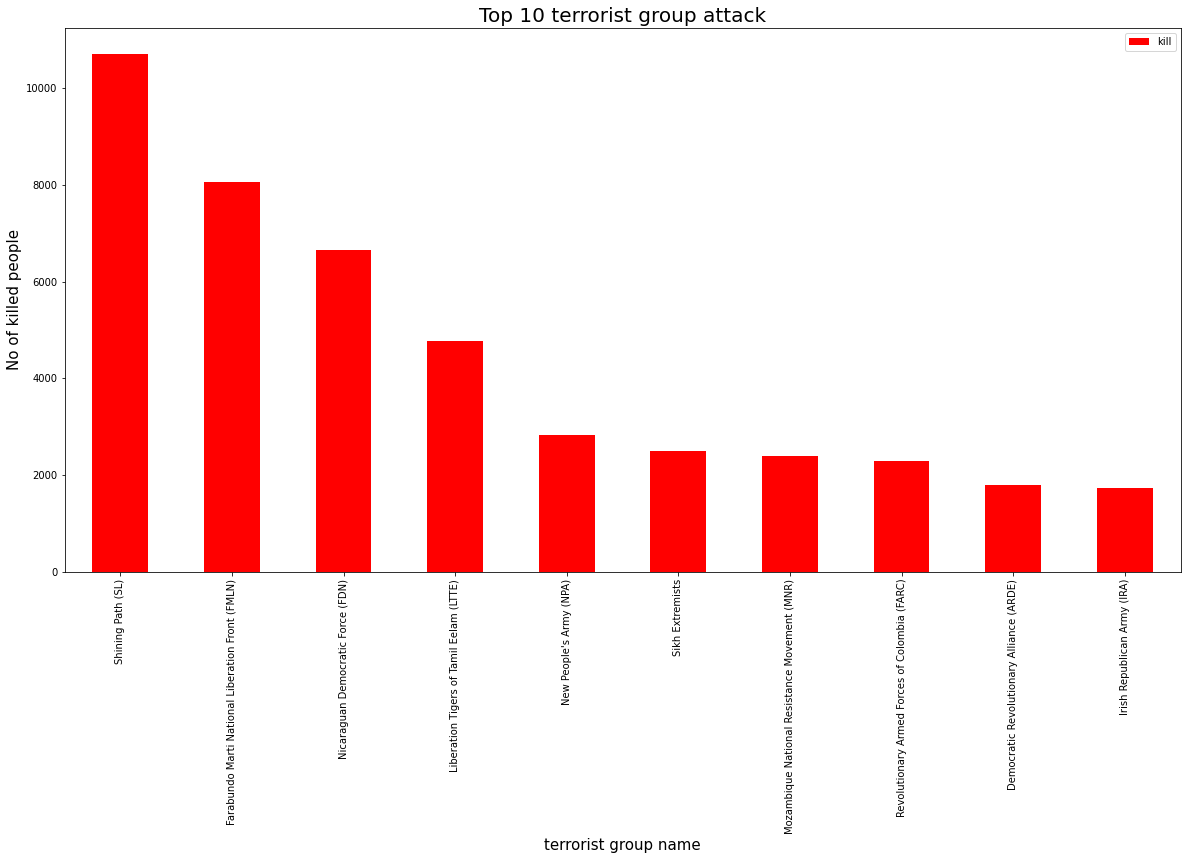

In [35]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [31]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Shining Path (SL),Peru,10698.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
2,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
3,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,4736.0
4,New People's Army (NPA),Philippines,2823.0
5,Mozambique National Resistance Movement (MNR),Mozambique,2316.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,2281.0
7,Sikh Extremists,India,2169.0
8,Democratic Revolutionary Alliance (ARDE),Nicaragua,1803.0
9,Irish Republican Army (IRA),United Kingdom,1676.0


In [32]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 93102


In [33]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,53841.0,11580.0,19351.0,1236.0,429.0,508.0,1408.0,94.0,4655.0


In [34]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,292.0,0.0,92.0,0.0,1068.0,0.0,397.0,2.0,7.0,21.0,...,0.0,164.0,286.0,97.0,1.0,4.0,14.0,42.0,69.0,136.0


**Conclusion and Results :**
* Country with the most attacks: Iraq
* City with the most attacks: Baghdad
* Region with the most attacks: Middle East & North Africa
* Year with the most attacks: 2014
* Month with the most attacks: 5
* Group with the most attacks: Taliban
* Most Attack Types: Bombing/Explosion